## plot_tc_wind.ipynb
Author: Robert M. Frost

University of Oklahoma

Created 23 August 2023

Purpose: Plot timeseries of maximum wind at different vertical levels of WRF TC simulation following the TC track

In [1]:
import sys
sys.path.append("/home/robbyfrost/jhr-wrf-python/")
from mask_tc_track import mask_tc_track
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from netCDF4 import Dataset

read in masked wind speed

In [2]:
# read in stitched output
dnc = "/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/robby/erin/mask_tc_wind/masked_tc_winds_agl_3000mtrack_1deg.nc"
ds = xr.open_dataset(dnc)

uc_mask = ds.u_control
vc_mask = ds.v_control
wspd_control_mask = ds.wspd_control
ud_mask = ds.u_diurnal
vd_mask = ds.v_diurnal
wspd_diurnal_mask = ds.wspd_diurnal

lat = ds.lat
lon = ds.lon
time = ds.time
z = ds.z

ds.close()

plotting set up

In [3]:
# plotting setup

# Set the font weight for plot titles
plt.rcParams['axes.titleweight'] = 'bold'

# Set the font weight for x-axis and y-axis labels
plt.rcParams['axes.labelweight'] = 'normal'

plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

# Other plotting setup
rc('font', family='sans-serif')
# plt.rcParams['font.family'] = 'DejaVu Sans'
rc('font', weight='normal', size=17.5)
rc('figure', facecolor='white') 

import cmocean
colors = cmocean.cm.thermal

plot timeseries of max wspd

In [4]:
# wspd10_max = np.empty(time.size)
wspd_c_max = np.empty(time.size)
wspd_d_max = np.empty(time.size)

for jt in range(time.size):
    wspd_c_max[jt] = np.nanmax(wspd_control_mask[jt,15], axis=(0,1))
    wspd_d_max[jt] = np.nanmax(wspd_diurnal_mask[jt,15], axis=(0,1))

/tmp/ipykernel_9402/2773704684.py:6: RuntimeWarning: All-NaN axis encountered
  wspd_c_max[jt] = np.nanmax(wspd_control_mask[jt,15], axis=(0,1))
/tmp/ipykernel_9402/2773704684.py:7: RuntimeWarning: All-NaN axis encountered
  wspd_d_max[jt] = np.nanmax(wspd_diurnal_mask[jt,15], axis=(0,1))


<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_9402/3887680258.py:11: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title("$\\bf{1^{\circ}}$ Averaged 3 km Maximum Wind Speed")


Text(0.5, 1.0, '$\\bf{1^{\\circ}}$ Averaged 3 km Maximum Wind Speed')

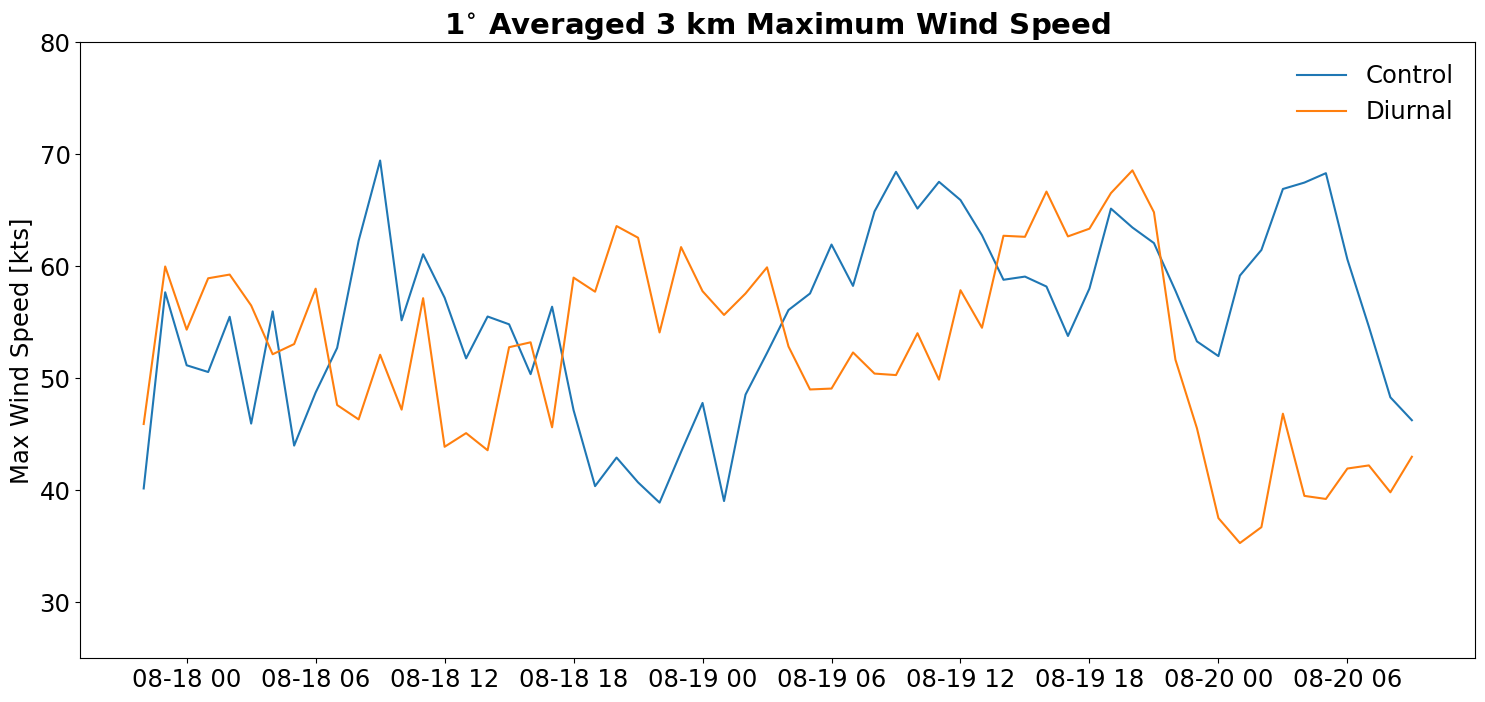

In [5]:
fig, ax = plt.subplots(figsize=(18,8))

ax.plot(time, wspd_c_max * 1.944, label="Control")#, c=colors[0])
ax.plot(time, wspd_d_max * 1.944, label="Diurnal")

ax.set_ylabel("Max Wind Speed [kts]")

ax.legend(frameon=False)
ax.set_ylim(25,80)

ax.set_title("$\\bf{1^{\circ}}$ Averaged 3 km Maximum Wind Speed")

In [6]:
# wspd10_max = np.empty(time.size)
wspd_c_mean = np.empty(time.size)
wspd_d_mean = np.empty(time.size)

for jt in range(time.size):
        wspd_c_mean[jt] = np.nanmean(wspd_control_mask[jt,15], axis=(0,1))
        wspd_d_mean[jt] = np.nanmean(wspd_diurnal_mask[jt,15], axis=(0,1))

/tmp/ipykernel_9402/3604806697.py:6: RuntimeWarning: Mean of empty slice
  wspd_c_mean[jt] = np.nanmean(wspd_control_mask[jt,15], axis=(0,1))
/tmp/ipykernel_9402/3604806697.py:7: RuntimeWarning: Mean of empty slice
  wspd_d_mean[jt] = np.nanmean(wspd_diurnal_mask[jt,15], axis=(0,1))


<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_9402/1839405009.py:11: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title("$\\bf{1^{\circ}}$ Averaged 3 km Mean Wind Speed")


Text(0.5, 1.0, '$\\bf{1^{\\circ}}$ Averaged 3 km Mean Wind Speed')

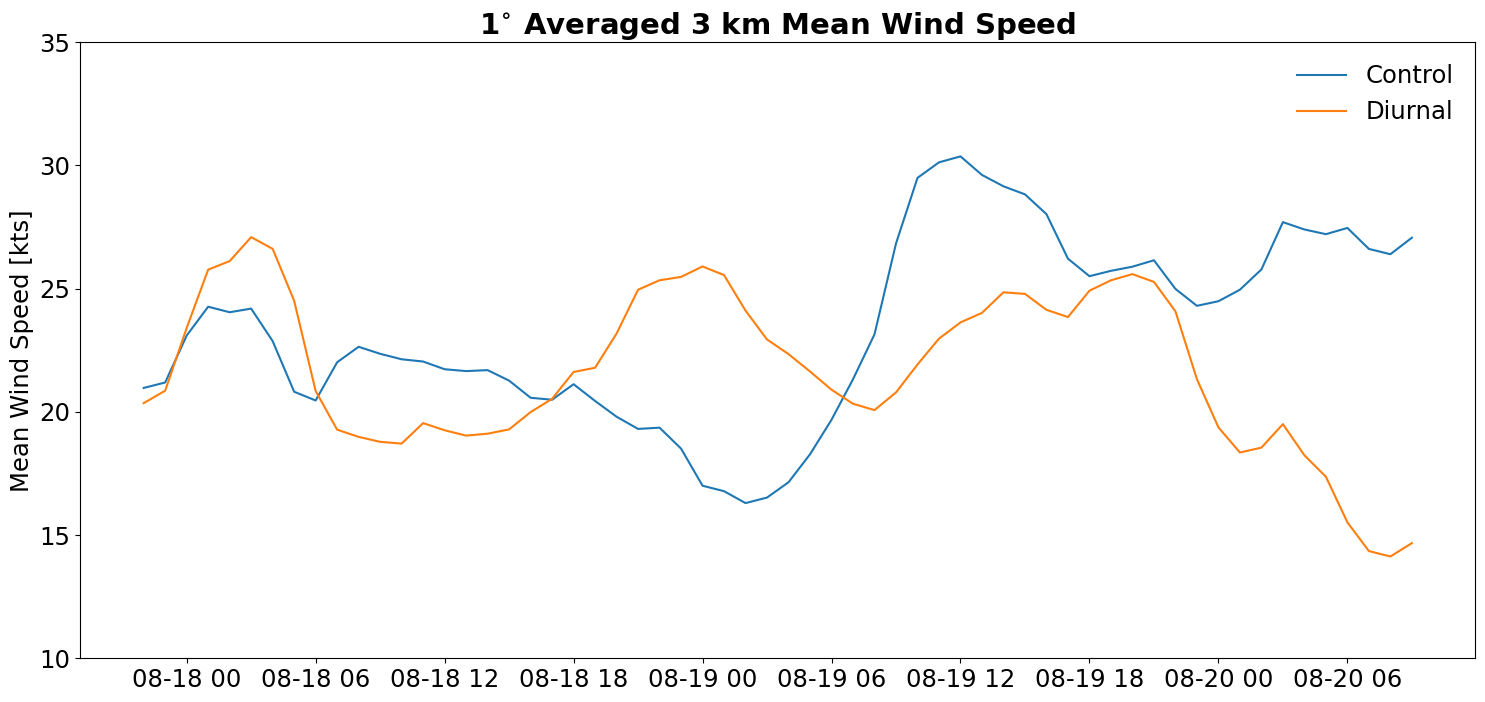

In [7]:
fig, ax = plt.subplots(figsize=(18,8))

ax.plot(time, wspd_c_mean * 1.944, label="Control")#, c=colors[0])
ax.plot(time, wspd_d_mean * 1.944, label="Diurnal")

ax.set_ylabel("Mean Wind Speed [kts]")

ax.legend(frameon=False)
ax.set_ylim(10,35)

ax.set_title("$\\bf{1^{\circ}}$ Averaged 3 km Mean Wind Speed")

Contour WSPD plots

In [18]:
duc = "/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_erin/analysis/c_aglinterp_U"
dvc = "/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_erin/analysis/c_aglinterp_V"
dud = "/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_erin/analysis/d_aglinterp_U"
dvd = "/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_erin/analysis/d_aglinterp_V"

uc = xr.open_dataarray(duc)
vc = xr.open_dataarray(dvc)
ud = xr.open_dataarray(dud)
vd = xr.open_dataarray(dvd)

time = uc.Time
z = np.arange(0,5000.1,200)
sn = uc.south_north
we = uc.west_east

In [20]:
z[15]

3000.0

Text(0.0, 1.0, 'Diurnal Case')

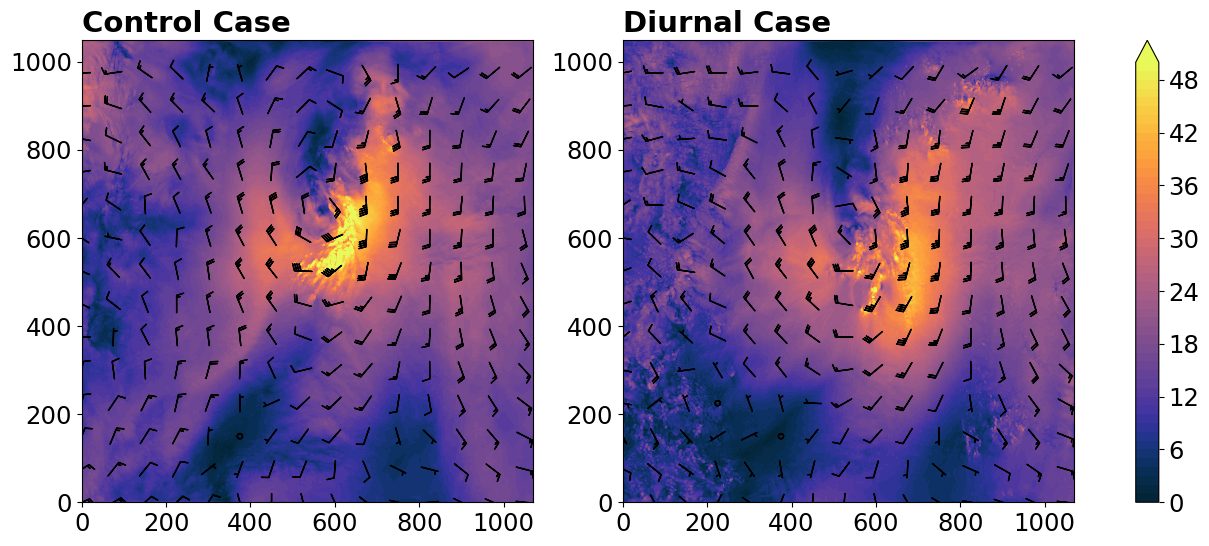

In [22]:
clevs = np.arange(0,50.1,1)
cmap = cmocean.cm.thermal

hidx = 15

wspd_control_plot = (uc[37,hidx] ** 2 + vc[37,hidx] ** 2) ** (1/2)
wspd_diurnal_plot = (ud[37,hidx] ** 2 + vd[37,hidx] ** 2) ** (1/2)

fig, ax = plt.subplots(ncols=2, figsize=(16,6))

cf = ax[0].contourf(we, sn, wspd_control_plot * 1.944, 
                    clevs, cmap=cmap, extend="max")

ax[1].contourf(we, sn, wspd_diurnal_plot * 1.944, 
               clevs, cmap=cmap, extend="max")

cbar = plt.colorbar(cf, ax=ax)

# Add wind barbs
barb_spacing = 75  # Adjust this value as needed for barb density
ax[0].barbs(we[::barb_spacing], sn[::barb_spacing],
            uc[37,hidx][::barb_spacing, ::barb_spacing] * 1.944, 
            vc[37,hidx][::barb_spacing, ::barb_spacing] * 1.944,
            length=5, pivot='middle', color='black')
ax[1].barbs(we[::barb_spacing], sn[::barb_spacing],
            ud[37,hidx][::barb_spacing, ::barb_spacing] * 1.944, 
            vd[37,hidx][::barb_spacing, ::barb_spacing] * 1.944,
            length=5, pivot='middle', color='black')

ax[0].set_title("Control Case", loc="left")
ax[1].set_title("Diurnal Case", loc="left")